In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("heart-disease.csv")
df.head();

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  condition  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df["condition"].value_counts()

condition
1    165
0    138
Name: count, dtype: int64

In [39]:
## Evaluation 
df["condition"].value_counts(normalize=True)

condition
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='condition'>

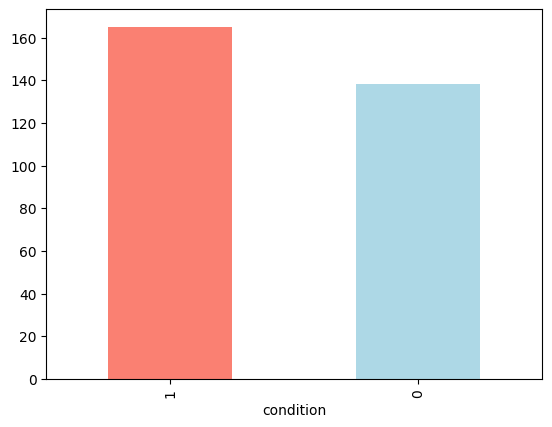

In [40]:
df["condition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

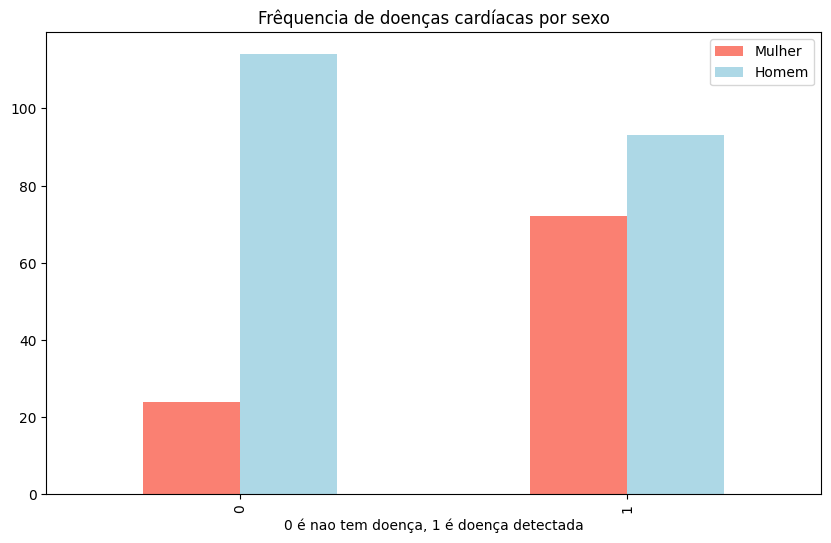

In [41]:
pd.crosstab(df["condition"], df["sex"]).plot(
        kind="bar", 
        figsize=(10,6), 
        color=["salmon", "lightblue"]
        )

plt.title("Frêquencia de doenças cardíacas por sexo")
plt.xlabel("0 é nao tem doença, 1 é doença detectada")
plt.legend(["Mulher", "Homem"])

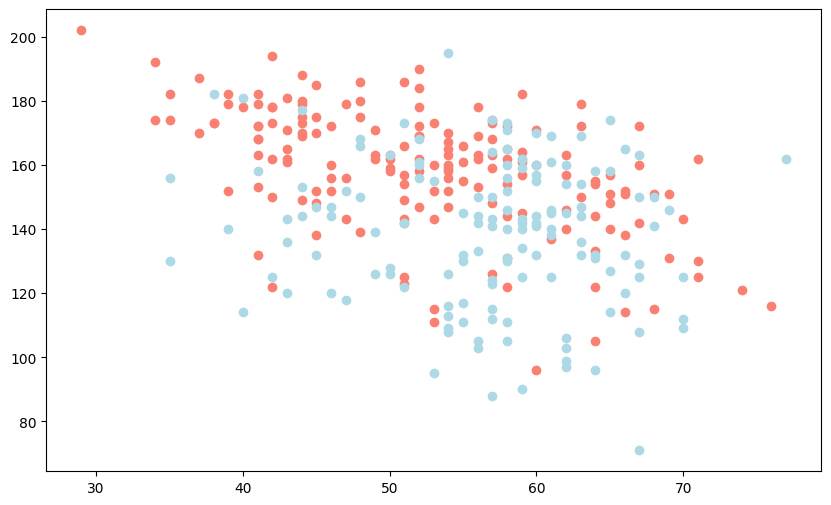

In [42]:
condition = df["condition"]
cx = "salmon"
cy = "lightblue"

plt.figure(figsize=(10, 6))

plt.scatter(df["age"] [condition == 1],
            df["thalach"] [condition == 1],
            c=cx)


plt.scatter(df["age"] [condition == 0],
            df["thalach"] [condition == 0],
            c=cy)

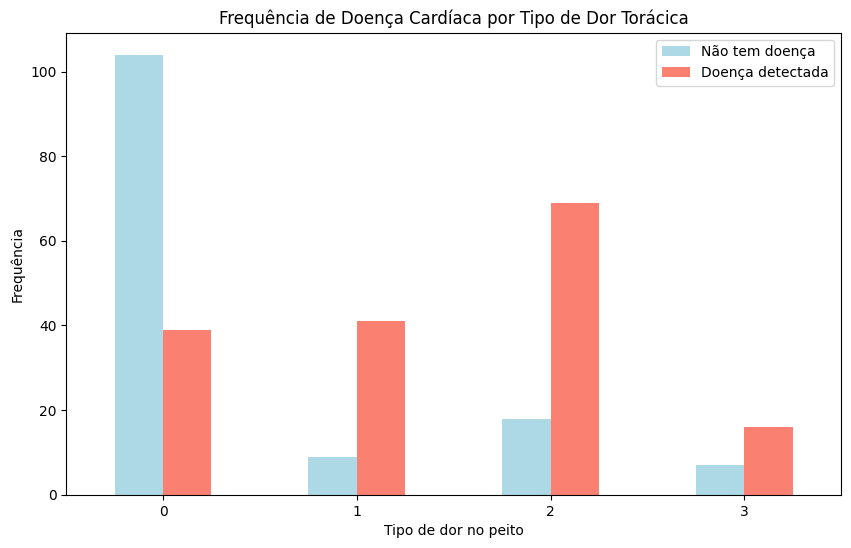

In [43]:
cp = df["cp"]

pd.crosstab(cp, condition).plot(kind="bar", figsize=(10,6), color=[cy, cx])
plt.title("Frequência de Doença Cardíaca por Tipo de Dor Torácica")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])
plt.xticks(rotation = 0);

## cp (dor no peito)
## 0 (típica dor no peito)
## 1 (dor no peito, não relacionada ao coração)
## 2 (espasmos, não relacionados ao coração)
## 3 (dor torácica, sem sinais de doença)

<Axes: >

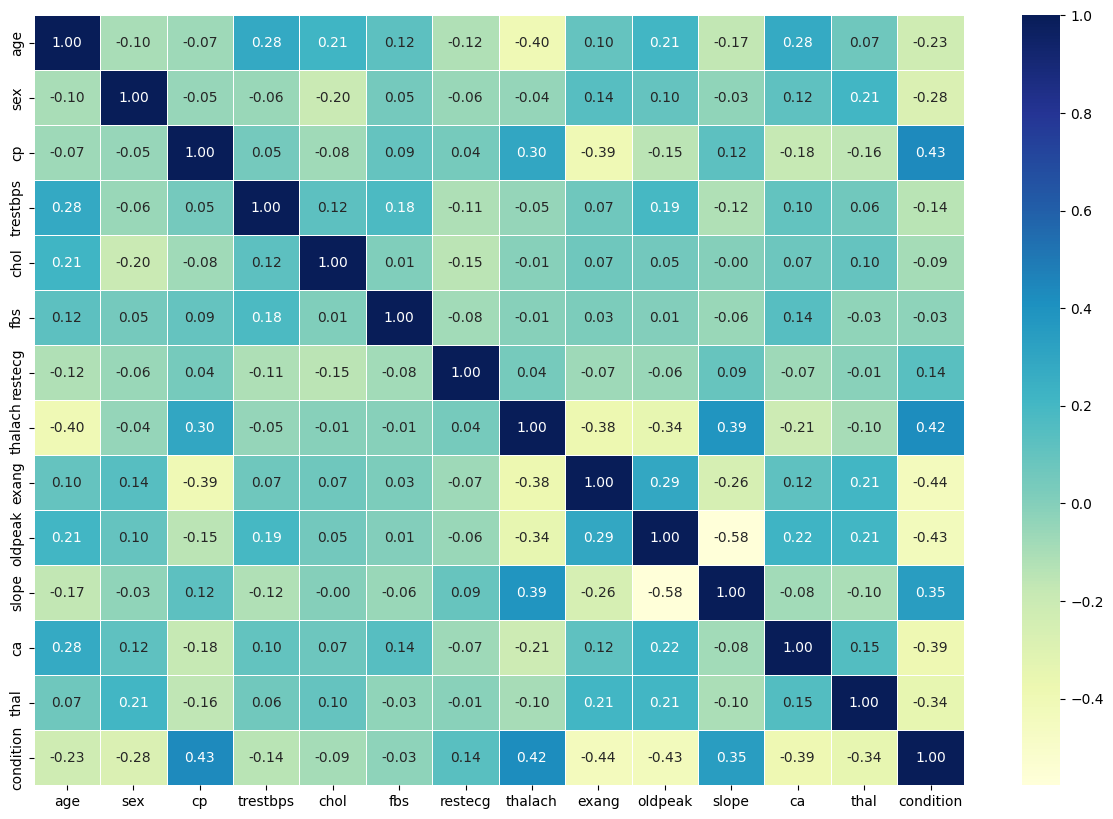

In [44]:

corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
    )

In [45]:
X = df.drop("condition", axis=1)
y = condition

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: condition, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

## X para treino e X para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Expondo a quantidade de dados que vão ser treinados
len(X_train), len(y_train)


(242, 242)

In [50]:
## Expondo a quantidade de dados que vão ser testados
len(X_test), len(y_test)

(61, 61)

In [51]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
# inserindo os algoritmos em um dicionário
models = {"KNN": KNeighborsClassifier(),
           "Logistc Regression": LogisticRegression(),
           "Random Forest": RandomForestClassifier()}

# criando uma função para treinar e avaliar os modelos
def fit_and_score(models, Xtrain, Xtest, yTrain, yTest):

  # seed para ter resultados reproduzíveis
  np.random.seed(42)

  # criando uma lista para armazenar o score dos modelos
  model_scores = {}

  # loop para executar todos os modelos
  for name, model in models.items():

    # treina o modelo com os dados
    model.fit(Xtrain, yTrain)

    # Avalia o modelo e adiciona seu score na lista
    model_scores[name] = model.score(Xtest, yTest)

  return model_scores

In [61]:
fit_and_score(models= models, 
              Xtrain = X_train, 
              Xtest = X_test, 
              yTrain = y_train, 
              yTest = y_test)

c:\Users\jean.medes\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6065573770491803,
 'Logistc Regression': 0.8688524590163934,
 'Random Forest': 0.9180327868852459}

In [66]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train, y_train);
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
    
    


In [67]:
train_scores


[1.0,
 0.7933884297520661,
 0.7768595041322314,
 0.7851239669421488,
 0.7727272727272727,
 0.756198347107438,
 0.7272727272727273,
 0.7355371900826446,
 0.7024793388429752,
 0.6694214876033058,
 0.6694214876033058,
 0.6694214876033058,
 0.6900826446280992,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339]

In [68]:
test_scores

[0.5409836065573771,
 0.5901639344262295,
 0.6557377049180327,
 0.5573770491803278,
 0.6065573770491803,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327]

Desempenho máximo de KNN nos dados de teste: 70.49%


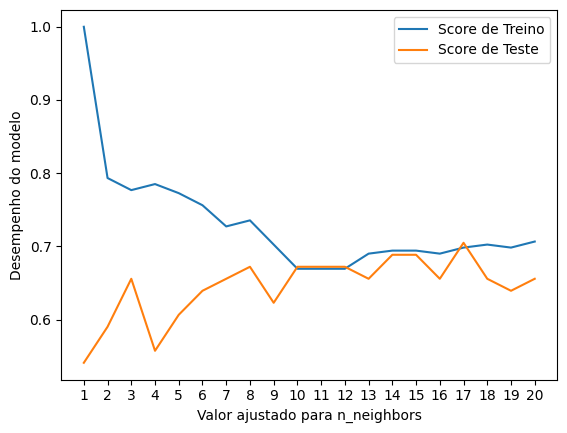

In [69]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

In [71]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [72]:
# Import
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [73]:
# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [74]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

rs_rf.score(X_test, y_test)

0.9180327868852459

In [75]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [76]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

gs_log_reg.score(X_test, y_test)


0.9016393442622951

In [77]:
y_preds = gs_log_reg.predict(X_test)

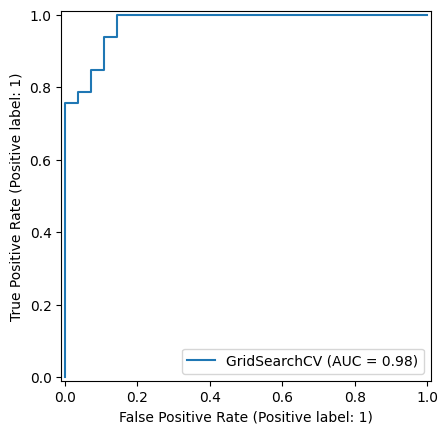

In [80]:
# Import ROC Curve
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve e calcula a métrica
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_preds))

[[24  4]
 [ 2 31]]


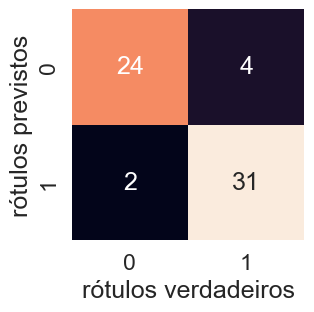

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_tegit st, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("rótulos verdadeiros")
    plt.ylabel("rótulos previstos")

plot_conf_mat(y_test, y_preds)